In [1]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

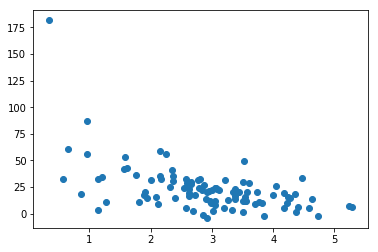

In [2]:
pageSpeeds = np.random.normal(3.,1.,100)
purchaseAmount = np.random.normal(50.,30.,100) / pageSpeeds

scatter(pageSpeeds,purchaseAmount)

In [3]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

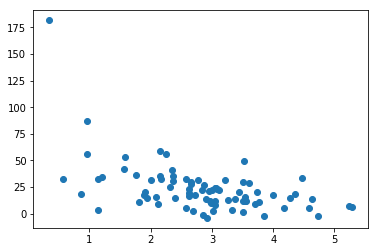

In [4]:
scatter(trainX,trainY)

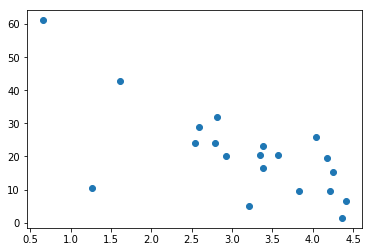

In [5]:
scatter(testX,testY)

In [6]:
x = np.array(trainX)
y = np.array(trainY)

In [7]:
p4 = np.poly1d(np.polyfit(x,y,8))

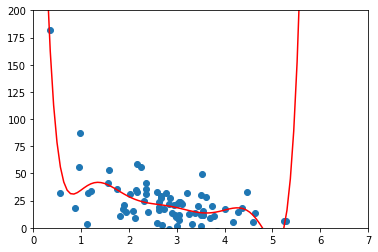

In [8]:
import matplotlib.pyplot as plt

xp = np.linspace(0,7,100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(x,y)
plt.plot(xp,p4(xp),c='r')
plt.show()

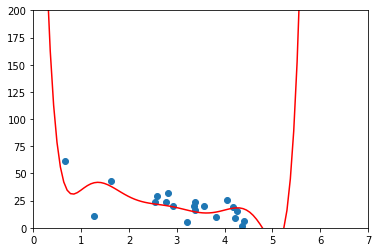

In [9]:
testx = np.array(testX)
testy = np.array(testY)
xp = np.linspace(0,7,100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(testx,testy)
plt.plot(xp,p4(xp),c='r')
plt.show()

In [11]:
from sklearn.metrics import r2_score
r2 = r2_score(testy,p4(testx))

print(r2)

0.30018168611266705


In [12]:
r2 = r2_score(y,p4(x))

print(r2)

0.6427069514690176


### Spam classifier, Naive Bayes

In [16]:
import os
import io
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def readFiles(path):
    for root, dirnames,filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)
            
            inBody = False
            lines = []
            f = io.open(path,'r',encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message

def dataFrameFromDirectory(path,classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message':message, 'class':classification})
        index.append(filename)
    
    return pd.DataFrame(rows,index=index)

data = pd.DataFrame({'message':[],'class':[]})

data = data.append(dataFrameFromDirectory('./emails/spam','spam'))
data = data.append(dataFrameFromDirectory('./emails/ham','ham'))

/anaconda2/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [17]:
data.head()

,class,message
./emails/spam/00249.5f45607c1bffe89f60ba1ec9f878039a,spam,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
./emails/spam/00373.ebe8670ac56b04125c25100a36ab0510,spam,ATTENTION: This is a MUST for ALL Computer Use...
./emails/spam/00214.1367039e50dc6b7adb0f2aa8aba83216,spam,This is a multi-part message in MIME format.\n...
./emails/spam/00210.050ffd105bd4e006771ee63cabc59978,spam,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
./emails/spam/00033.9babb58d9298daa2963d4f514193d7d6,spam,This is the bottom line. If you can GIVE AWAY...


In [18]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data['message'].values)

In [19]:
classifier = MultinomialNB()

In [20]:
targets = data['class'].values

In [21]:
classifier.fit(counts,targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
examples = ['Free Viagra now!!','Hi Bob, how about a game of golf tomorrow?']
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['spam', 'ham'], dtype='<U4')

#### K means

In [30]:
def createClusteredData(N,k):
    np.random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range(k):
        incomeCentroid = np.random.uniform(20000.,200000.)
        ageCentroid = np.random.uniform(20.,70.)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid,10000.),np.random.normal(ageCentroid,2.)])
    X = np.array(X)
    return X

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

data = createClusteredData(100,5)

model = KMeans(n_clusters=5)
model = model.fit(scale(data))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


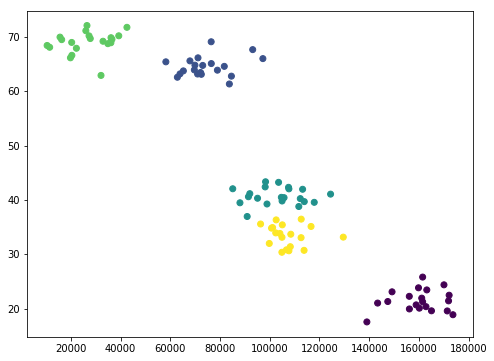

In [35]:

print(model.labels_)

plt.figure(figsize=(8,6))
plt.scatter(data[:,0],data[:,1],c=model.labels_.astype(np.float))
plt.show()

#### Decision Tree

In [37]:
import numpy as np
import pandas as pd
from sklearn import tree

In [38]:
df = pd.read_csv('PastHires.csv', header = 0)

In [39]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [40]:
d = {'Y':1, 'N':0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)

In [41]:
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [46]:
features = list(df.drop('Hired',axis=1).columns)

In [47]:
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [48]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

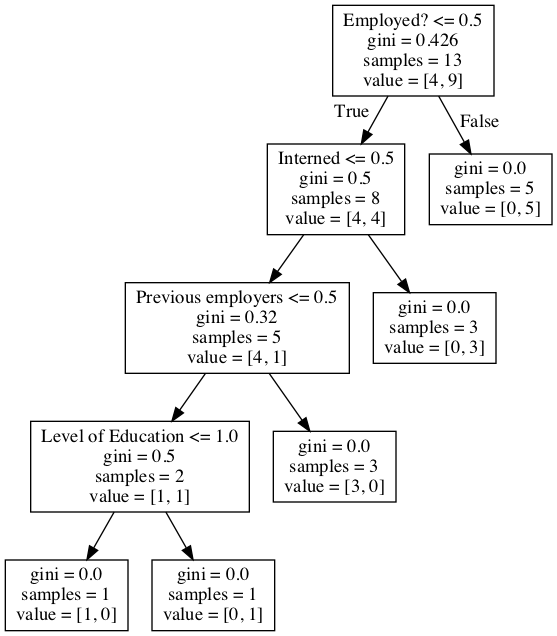

In [49]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
rfc = clf.fit(X, y)

print (rfc.predict([[10, 1, 4, 0, 0, 0]]))
print (rfc.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]


#### Support Vector Machines

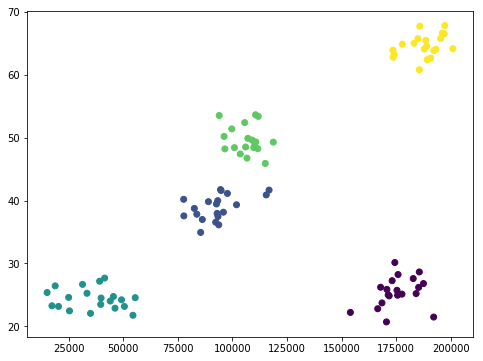

In [66]:
def createClusteredData(N, k):
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

(X, y) = createClusteredData(100, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

In [67]:
from sklearn import svm, datasets

In [68]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

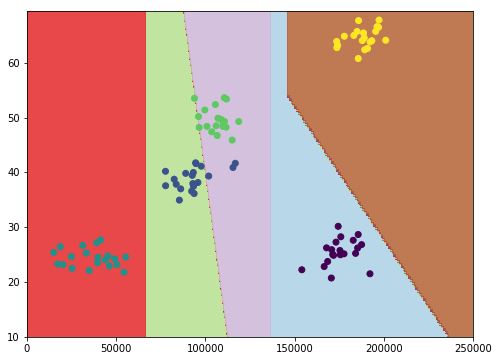

In [69]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 250000, 10),
                     np.arange(10, 70, 0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    
plotPredictions(svc)

In [70]:
print(svc.predict([[200000, 40]]))

[4]


In [71]:
print(svc.predict([[50000, 65]]))

[2]
